<a href="https://colab.research.google.com/github/jakubtwalczak/Muller_Guido_Introduction_to_ML/blob/main/Rozdzia%C5%82_4_reprezentacja_danych_i_in%C5%BCynieria_cech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We wcześniejszych notatnikach dane pojawiały się na ogół jako dwuwymiarowa tablica liczb zmiennoprzecinkowych, gdzie każda kolumna to cecha ciągła opisująca punkty danych. W wielu zastosowaniach dane mamy gromadzone w postaci cech kategorialnych. Przykładami może być marka produktu, kolor, dział, w którym jest sprzedawany itp. Są to wszystkie cechy opisujące próbkę, które nie różnią się w sposób ciągły.

Sposób reprezentacji danych może mieć ogromny wpływ na wydajność modelu uczenia maszynowego, często znacznie większy niż dostrojenie modelu. Określanie, jak najlepiej przedstawić dane dla konkretnego zastosowania, nazywamy inżynierią cech.

# Zmienne kategorialne.

Są to wszelkie zmienne, które opisują próbkę danych nie pod kątem ilościowym, a jakościowym. Pochodzą one z ustalonej listy możliwych wartości. Z reguły zapisane są one w postaci tekstowej, toteż skorzystanie z nich w modelu uczenia maszynowego wymaga odpowiedniego potraktowania. Załóżmy, że chcemy na podstawie danych z takimi cechami wyuczyć klasyfikator regresji logistycznej. Ogólny wzór na predykcję ma sens tylko wtedy, gdy cechy x[0], x[1], ..., x[p] to liczby, ale nie wtedy, gdy są to konkretne wartości, typu płeć, poziom wykształcenia itp.

## One-hot-encoding (kodowanie jeden z N, zmienne fikcyjne).

Najczęściej stosowany sposób reprezentacji zmiennych kategorialnych. Ideą jest zastąpienie zmiennej kategorialnej jedną lub większą liczbą nowych cech o wartościach 0 lub 1. Wprowadziwszy jedną nową cechę na kategorię, możemy reprezentować dowolną liczbę kategorii.

Pracować będziemy na zbiorze danych Adult Path. Mamy cechę workclass, która przyjmuje cztery możliwe wartości. Aby je zakodować, tworzymy cztery nowe cechy, która ma wartość 1, jeżeli workclass ma dla próbki odpowiednią wartość, w przeciwnym wypadku (jedna z trzech pozostałych wartości) wartość wyniesie 0. Dlatego właśnie nazywamy to kodowaniem jeden z N lub typu one-hot.

Kodowanie tego typu umożliwia zarówno biblioteka Scikit-learn, jak i Pandas. Poniżej sposób z biblioteki Pandas, który jest nieco łatwiejszy.

In [1]:
import pandas as pd
import os
import mglearn

adult_path = os.path.join(mglearn.datasets.DATA_PATH, "adult.data")
data = pd.read_csv(adult_path, header=None, index_col=False,
                   names=['age', 'workclass', 'fnlwgt', 'education', 'education-num','marital-status',
                          'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
                          'hours-per-week', 'native-country', 'income'])
data = data[['age', 'workclass', 'education', 'sex', 'hours-per-week', 'occupation', 'income']]
data.head()

,age,workclass,education,sex,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


## Sprawdzanie danych kategorialnych zakodowanych jako ciągi znaków.

Po przeczytaniu takiego zbioru danych warto sprawdzić, czy kolumna faktycznie zawiera sensowne dane kategorialne. Gdy pracujemy z danymi, które zostały wprowadzone przez ludzi, może nie istnieć ustalony zestaw kategorii, a różnice w pisowni, wielkości liter itp. mogą wymagać standaryzacji (np. określenie płci jako "Męska", "mężczyzna", "M" itp.). Sprawdźmy zawartość kolumny przy pomocy funkcji value_counts z biblioteki Pandas, która wyświetli unikalne wartości i częstość ich wystąpień.

In [2]:
print(data.sex.value_counts())

sex
Male      21790
Female    10771
Name: count, dtype: int64


W kolumnie sex występują dokładnie dwie wartości dla płci. Takie dane możemy zakodować metodą jeden z N. W prawdziwym zastosowaniu powinniśmy przyjrzeć się wszystkim kolumnom i znajdującym się w nich wartościom, ale dla celów naukowych taka prezentacja jest wystarczająca.

Sposobem z biblioteki Pandas na kodowanie one-hot jest funkcja get_dummies, która automatycznie przekształca wszystkie kolumny typu object (czyli przeważnie ciągi znaków) lub kategoryczne (categorical).

Uwaga: powinniśmy użyć parametru dtype=int, który zwróci wartości 0 lub 1. Domyślnym typem jest typ bool, więc zwrócone wartości to True lub False.

In [3]:
print(f"Original features:\n {list(data.columns)}\n")
data_dummies = pd.get_dummies(data, dtype=int)
print(f"Features after get_dummies:\n {list(data_dummies.columns)}")

Original features:
 ['age', 'workclass', 'education', 'sex', 'hours-per-week', 'occupation', 'income']

Features after get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'sex_ Female', 'sex_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'o

Cechy ciągłe age i hours-per-week pozostały nienaruszone. Cechy kategorialne zostały za to przekształcone na tyle cech, ile unikalnych wartości jest w każdej kolumnie.

In [4]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


Aby przekonwertować powyższy DataFrame na tablicę NumPy, używamy atrybutu values, a dopiero na niej uczymy model uczenia maszynowego. Przed uczeniem modelu należy oddzielić od danych zmienną docelową, zakodowaną w dwóch kolumnach z przedrostkiem income.

Wyodrębniamy więc tylko kolumny zawierające cechy - od age do occupation_ Transport-moving.

In [5]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
X = features.values
y = data_dummies['income_ >50K'].values
print(f"X.shape: {X.shape} y.shape: {y.shape}")

X.shape: (32561, 44) y.shape: (32561,)


Teraz dane są przedstawione tak, że funkcje biblioteki Scikit-learn mogą z nim bez trudu pracować.

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)
print("Test score: {:.2f}".format(logreg.score(X_test, y_test)))

Test score: 0.81


Ważnym jest, aby zapewnić, że wartości kategorialne są jednakowo reprezentowane w zbiorze treningowym i testowym. Dlatego też funkcję get_dummies należy wywołać na obiekcie DataFrame przed podziałem na dane uczące i testowe, dobrą praktyką jest też sprawdzenie, czy nazwy kolumn w obu zbiorach się pokrywają.

## Kodowanie zmiennych kategorialnych w formie liczbowej.

Zmienne kategorialne w powyższym wypadku zostały zaprezentowane jako ciągi znaków. Często jednak się zdarza, że w celu uniknięcia błędów czy też dla ułatwienia przechowywania zmienne kategorialne są kodowane jako liczby całkowite. Np. kolumna, której nazwa wskazuje na zmienną kategorialną, zawierać może liczby i dla kogoś, kto spojrzy na tabelę po raz pierwszy, nie będzie oczywiste, czy taką zmienną traktować jako ciągłą, czy jako kategorialną. Jeżeli liczby wskazują np. status zatrudnienia, to jednak wydaje się jasne, że nie powinien być on modelowany przez jedną zmienną ciągłą. Jeśli nie ma uporządkowania między kodowanymi semantykami (np. cecha workclass z powyższego zbioru), należy ją traktować jako dyskretną. Dla takich przypadków, jak np. oceny od 1 do 5 gwiazdek, kodowanie zależne jest od zadania i używanego algorytmu.

Funkcja get_dummies domyślnie traktuje wszystkie liczby jako ciągłe i nie tworzy dla nich zmiennych fikcyjnych. Ten problem można obejść albo przy użyciu klasy OneHotEncoder z biblioteki Scikit-learn, albo wskazując funkcji get_dummies kolumny, jakie chcemy przekonwertować. Utwórzmy ramkę danych z dwiema kolumnami: jedną z liczbami całkowitymi, drugą z ciągami znaków.

In [7]:
demo_df = pd.DataFrame({
                        'Numerical feature': [0, 1, 2, 1],
                        'Categorical feature': ['socks', 'fox', 'socks', 'box']
                        })
demo_df

,Numerical feature,Categorical feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


Użycie funkcji get_dummies zakoduje tylko drugą kolumnę tekstową, nie zmieniając pierwszej w postaci liczby całkowitej.

In [8]:
pd.get_dummies(demo_df)

,Numerical feature,Categorical feature_box,Categorical feature_fox,Categorical feature_socks
0,0,False,False,True
1,1,False,True,False
2,2,False,False,True
3,1,True,False,False


Można użyć parametru columns dla funkcji get_dummies i jawnie wskazać, które kolumny należy zakodować.

In [9]:
pd.get_dummies(demo_df, columns=['Numerical feature', 'Categorical feature'], dtype=int)

,Numerical feature_0,Numerical feature_1,Numerical feature_2,Categorical feature_box,Categorical feature_fox,Categorical feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


# Dzielenie, dyskretyzacja, modele liniowe i drzewa.

Najlepszy sposób reprezentacji danych zależy zarówno od ich znaczenia, jak i algorytmu używanego do predykcji. Modele liniowe i modele oparte na drzewach mają mocno zróżnicowane właściwości, jeżeli mowa o ich pracy z różnymi reprezentacjami cech.

Wróćmy do zbioru Make Wave, który posiada tylko jedną cechę wejściową, i porównajmy model regresji liniowej i drzewa decyzyjnego w tym zbiorze.

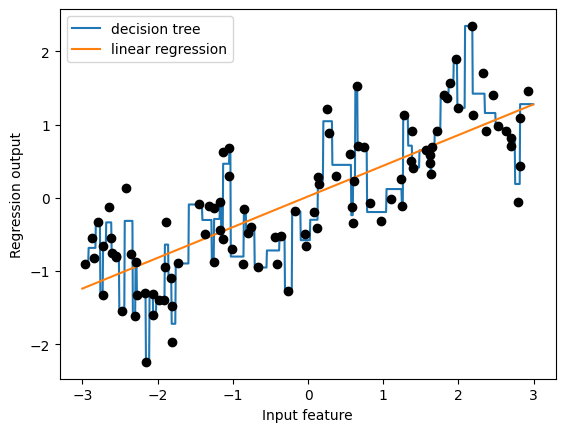

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="decision tree")
reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="linear regression")
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

Modele liniowe mogą modelować tylko relacje liniowe, które są liniami w przypadku pojedynczej cechy, podczas gdy drzewo decyzyjne może budować bardziej złożone modele. Występuje tu jednak silna zależność od reprezentacji danych.

Jednym ze sposobów podniesienia wydajności modelu liniowego w przypadku danych ciągłych jest użycie grupowania danych, zwanego też dyskretyzacją cech, aby podzielić dane na wiele cech. Wyobraźmy sobie, że chcemy podzielić zakres wejściowy dla cechy na ustaloną liczbę przedziałów (np. 10 przedziałów od -3 do 3). Punkt danych reprezentowany jest przez to, do jakiego przedziału należy. Funkcja np.linspace pozwoli zdefiniować 10 przedziałów od -3 do 3 w równych odstępach.

In [11]:
bins = np.linspace(-3, 3, 11)
print(f"Bins: {bins}")

Bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


Następnie dla każdego punktu danych rejestrujemy, do jakiego przedziału danych do zaliczamy - funkcja np.digitize.

In [12]:
which_bin = np.digitize(X.reshape(-1), bins=bins)
print(f"X: {X[:5]}")
print(f"which_bin: {which_bin[:5]}")

X: [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
which_bin: [ 4 10  8  6  2]


Udało nam się przekształcić cechą ciągłą w zbiorze danych na cechę kategorialną, która wskazuje na przedział, w którym mieszczą się dane. Aby użyć na nich modelu uczenia maszynowego, przekształcić możemy ją z wykorzystaniem klasy OneHotEncoder. Działa ona analogicznie do metody pd.get_dummies.

In [13]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
encoder.fit(which_bin.reshape(-1, 1))
X_binned = encoder.transform(which_bin.reshape(-1, 1))
print(f"X_binned[:5]:\n {X_binned[:5]}")

X_binned[:5]:
 [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


Przekształcony zbiór danych X_binned składa się teraz z 10 cech.

In [14]:
print(f"X_binned.shape: {X_binned.shape}")

X_binned.shape: (100, 10)


Stwórzmy nowy model regresji liniowej i nowy model drzewa decyzyjnego na danych zakodowanych metodą one-hot.

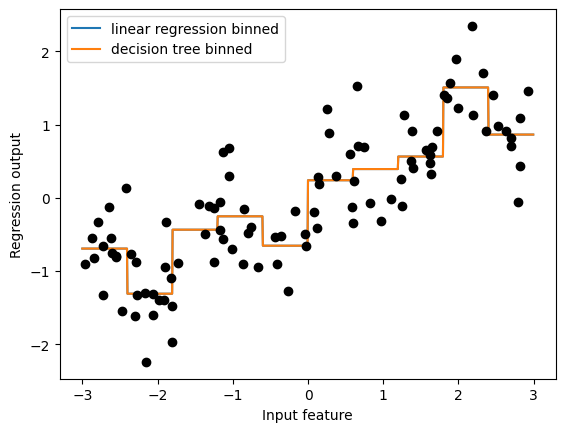

In [15]:
line_binned = encoder.transform(np.digitize(line, bins=bins).reshape(-1, 1))
reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')
reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='decision tree binned')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

Obie linie - dla regresji liniowej i drzewa decyzyjnego - znajdują się teraz jedna na drugiej, bowiem modele predykują identycznie. Dla każdego przedziału prognozowana jest dokładnie ta sama wartość, ponieważ cechy są stałe w każdym przedziale. Model liniowy stał się bardziej elastyczny, gdyż dla każdego przedziału przyjmuje teraz inną wartość. Spadła natomiast elastyczność modelu drzewa decyzyjnego; dyskretyzacja ogólnie nie jest dla tych modeli korzystna, bowiem te modele uczą się, jaka kategoryzacja jest najbardziej przydatna do prognozowania na tych danych. Jeżeli istnieją dobre powody, by użyć modelu liniowego dla określonych danych (np. bardzo dużych i wielowymiarowych, ale z niektórymi elementami o nieliniowych relacjach z wynikiem), grupowanie może pomóc w zwiększeniu wydajności modelowania.